### Duplicate Handling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Local\Temp\ipykernel_1300\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [4]:
df.value_counts()

brand    style  rating
Yum Yum  cup    4.0       2
Indomie  cup    3.5       1
         pack   5.0       1
                15.0      1
Name: count, dtype: int64

In [5]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [6]:
df.drop_duplicates(inplace=True)
print(df)



     brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0




<br>

### Outliers Handling

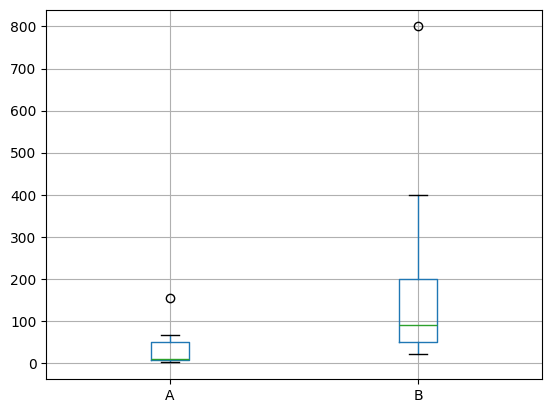

In [7]:

df = pd.DataFrame({
    'A': [1, 26, 3, 4, 52, 6, 7, 8, 9, 10, 50,67, 155],
    'B': [20, 30, 40, 50, 60, 70, 800, 90, 100, 110, 200, 400, 300]
})
df.boxplot()
plt.show()
plt.close()

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [9]:
df_trim = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
df_trim

,A,B
0,1,20
1,26,30
2,3,40
3,4,50
4,52,60
5,6,70
7,8,90
8,9,100
9,10,110
10,50,200


### Handling Incorrect Data

In [11]:
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['John', 'Jane', 'Bob', 'Alice', 'David'],
    'age': [25, -31, 42, 19, 37],
    'gender': ['M', 'F', 'M', 'F', 'Z'],
    'income': [50000, 70000, np.nan, '30000', 60000]
})
data


,id,name,age,gender,income
0,1,John,25,M,50000
1,2,Jane,-31,F,70000
2,3,Bob,42,M,NaN
3,4,Alice,19,F,30000
4,5,David,37,Z,60000


In [12]:
# Identify Incorrect Data
incorrect_age = data[(data['age'] <=0) | (data['age'] > 100)]
incorrect_gender = data[~data['gender'].isin(['M', 'F'])]

In [13]:
data.loc[incorrect_age.index, 'age'] = np.nan
data


,id,name,age,gender,income
0,1,John,25.0,M,50000
1,2,Jane,NaN,F,70000
2,3,Bob,42.0,M,NaN
3,4,Alice,19.0,F,30000
4,5,David,37.0,Z,60000


In [14]:
data = data.drop(incorrect_gender.index)
data

,id,name,age,gender,income
0,1,John,25.0,M,50000
1,2,Jane,NaN,F,70000
2,3,Bob,42.0,M,NaN
3,4,Alice,19.0,F,30000


### Handling inconsistent data

In [15]:
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'country': ['USA', 'U.S.A.', 'United States', 'Canada', 'Mexico'],
    'date': ['2021-01-01', '01/01/2021', '2021-01-01', '2021-01-01', '01-01-2021']
})
data

,id,country,date
0,1,USA,2021-01-01
1,2,U.S.A.,01/01/2021
2,3,United States,2021-01-01
3,4,Canada,2021-01-01
4,5,Mexico,01-01-2021


In [16]:
# replace
# Define rules for resolving inconsistencies
country_codes = {
    'USA': 'US',
    'U.S.A.': 'US',
    'United States': 'US',
    'Canada': 'CA',
    'Mexico': 'MX'
}
data['country'].replace(country_codes, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1300\1026324780.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].replace(country_codes, inplace=True)


In [17]:
data

,id,country,date
0,1,US,2021-01-01
1,2,US,01/01/2021
2,3,US,2021-01-01
3,4,CA,2021-01-01
4,5,MX,01-01-2021


In [18]:
# Handling inconsistent Date:
# Converting the first date t0 a datetime object
data['date'] = pd.to_datetime(data['date'], format='mixed', dayfirst=True)
data

,id,country,date
0,1,US,2021-01-01
1,2,US,2021-01-01
2,3,US,2021-01-01
3,4,CA,2021-01-01
4,5,MX,2021-01-01


In [19]:
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'country': ['USA', 'U.S.A.', 'United States', 'Canada', 'Mexico'],
    'date': ['2021-01-01', '01/01/2021', '2021-01-01', '2021-01-01', '01-01-2021']
})
data

,id,country,date
0,1,USA,2021-01-01
1,2,U.S.A.,01/01/2021
2,3,United States,2021-01-01
3,4,Canada,2021-01-01
4,5,Mexico,01-01-2021


In [22]:
# Handling inconsistent country Name using apply() method
country_codes = {
    'USA': 'US',
    'U.S.A.': 'US',
    'United States': 'US',
    'Canada': 'CA',
    'Mexico': 'MX'
}

data['country']=data['country'].apply(lambda x: country_codes.get(x,x))
data['date']= pd.to_datetime(data['date'], format='mixed', dayfirst=True)
data

,id,country,date
0,1,US,2021-01-01
1,2,US,2021-01-01
2,3,US,2021-01-01
3,4,CA,2021-01-01
4,5,MX,2021-01-01
